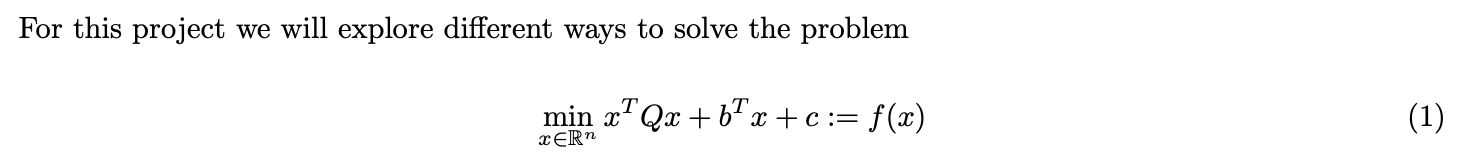

In [306]:
np.random.seed(1234)

In [307]:
import numpy as np
def get_Q_b_c (n):
  Q = np . random . rand (n ,n)-0.5
  Q = 10*Q @ Q.T
  b = 5*( np . random . rand (n)-0.5 )
  c = 2*( np . random . rand (1)-0.5 )
  return Q ,b ,c
# Example :
Q , b , c = get_Q_b_c ( 10 )

In [308]:
print(Q)

[[ 8.17790788  1.64381651  1.83449367  0.87016174  2.37955712  3.30674925
  -0.94535727 -6.11769127  2.63295783  1.85411456]
 [ 1.64381651  5.76976832 -2.98034605 -1.53484244 -0.70426143 -0.29021875
  -5.32877555 -2.9167728  -0.82912895 -0.57726154]
 [ 1.83449367 -2.98034605  5.71724835  1.7068594   3.34416672  2.62822829
   1.6124579   0.80464985 -0.94799645  1.56545641]
 [ 0.87016174 -1.53484244  1.7068594   8.72577819 -1.49665308  3.74162637
  -0.16408146  2.25983368  0.60004391 -0.6816531 ]
 [ 2.37955712 -0.70426143  3.34416672 -1.49665308  7.80325145 -1.33995689
   1.00408855 -0.76987969 -2.8210287   2.74441941]
 [ 3.30674925 -0.29021875  2.62822829  3.74162637 -1.33995689 12.15675281
  -0.12809338 -0.49572529  1.59667111 -0.65823513]
 [-0.94535727 -5.32877555  1.6124579  -0.16408146  1.00408855 -0.12809338
   8.88649124  2.16176057  2.32952836  2.00463931]
 [-6.11769127 -2.9167728   0.80464985  2.25983368 -0.76987969 -0.49572529
   2.16176057  7.4475304  -3.24708812 -0.55418954]


In [309]:
print(b)

[ 1.33558314  1.04057681  1.48433592  0.28880414  2.32918266 -1.7642155
 -2.351765    0.46946746 -1.92967151  2.25404925]


In [310]:
print(c)

[-0.34858517]


In [311]:
def f(x, Q, b, c):
  return x.T @ Q @ x + b.T @ x + c
def grad_1_f(x, Q, b):
  return 2 * Q @ x + b.reshape(10,1)
def grad_2_f(x, Q):
  return 2 * Q

1. [Constant step size]
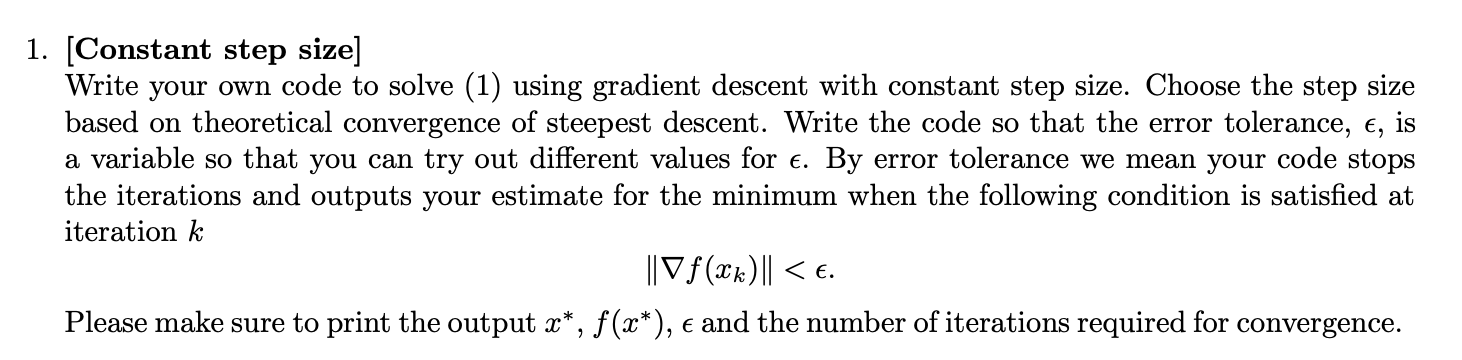

先找到一个lambda是让f(x)convergence， 然后用steepest descent方法找到optima x 

error可以随便定

In [312]:
# find the proper constant step size
x = np.random.rand(10,1)
L = np.linalg.norm(grad_1_f(x, Q, b))

stepsize = (2/ L) * 0.99
print(stepsize)

0.044398414455067106


In [313]:
e = 1e-6
k = 0
max_iter = 10000000
while np.linalg.norm(grad_1_f(x, Q, b)) > e:
  x_previous = x
  x = x - stepsize * grad_1_f(x, Q, b)
  k = k+1
  if k >= max_iter or f(x, Q, b, c) > f(x_previous, Q, b, c):
    break

In [314]:
print(x)
print(f(x, Q, b, c))
print(np.linalg.norm(grad_1_f(x, Q, b)))
print(e)

[[-0.61163071]
 [-0.06760831]
 [-0.08913254]
 [ 0.21018686]
 [-0.14127467]
 [ 0.19617522]
 [ 0.38762748]
 [-0.9014237 ]
 [-0.39738693]
 [ 0.00615213]]
[[-1.4426304]]
9.904188154731099e-07
1e-06


In [315]:
# test for a random 1
x1 = np.random.rand(10,1)
print(x1)
print(f(x1, Q, b, c))

[[0.90008784]
 [0.7791638 ]
 [0.59915478]
 [0.29112524]
 [0.15139526]
 [0.33517466]
 [0.65755178]
 [0.07334254]
 [0.0550064 ]
 [0.32319481]]
[[23.40129223]]


2. [Armijo’s rule]
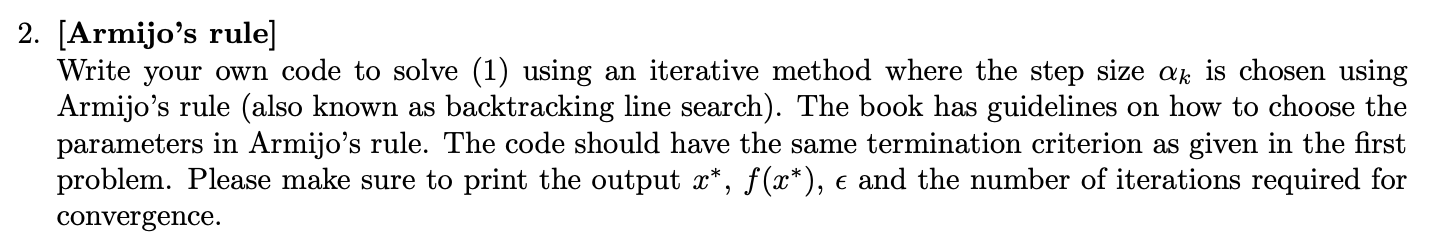

In [316]:
# initialize
alpha = 1
sigma = 0.2
beta = 0.3
iter = 0
# armigo
while(f(x + (alpha*-1*grad_1_f(x, Q, b)), Q, b, c) > f(x, Q, b, c) - ((sigma * alpha * grad_1_f(x, Q, b).T @ grad_1_f(x, Q, b)))):
  print(iter)
  alpha = beta*alpha
  iter = iter + 1
  

print(alpha)
print(x+(beta**iter)*alpha*(-1*grad_1_f(x, Q, b)))
print(f(x+(beta**iter)*alpha*(-1*grad_1_f(x, Q, b)), Q, b, c))
print(e)

1
[[-0.61163092]
 [-0.06760849]
 [-0.08913261]
 [ 0.21018701]
 [-0.14127493]
 [ 0.19617528]
 [ 0.38762765]
 [-0.90142432]
 [-0.39738752]
 [ 0.00615235]]
[[-1.4426304]]
1e-06


3. [Matrix Inversion]
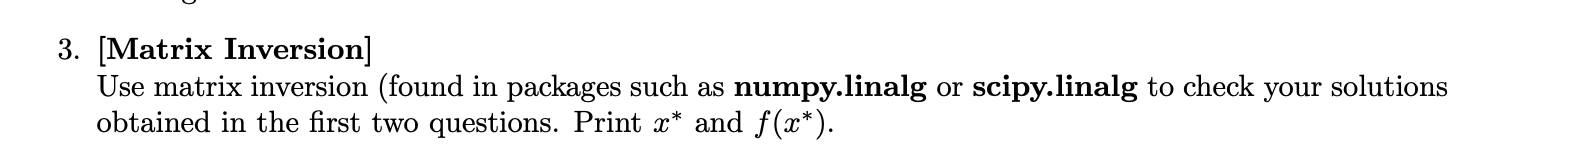

In [317]:
x_optima = (1/2) * -1 * np.linalg.inv(Q) @ b
print(x_optima)
print(f(x_optima, Q, b, c))

[-0.61163147 -0.06760895 -0.08913279  0.21018742 -0.1412756   0.19617544
  0.3876281  -0.9014259  -0.39738906  0.0061529 ]
[-1.4426304]
